In [2]:
import pymatgen as pymat
from pymatgen.core.periodic_table import Element
import mendeleev as mendel
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

In [3]:
fcc_elements = ["Ag", "Al", "Au", "Cu", "Ir", "Ni", "Pb", "Pd", "Pt", "Rh", "Th", "Yb"]
bcc_elements = ["Ba", "Ca", "Cr", "Cs", "Eu", "Fe", "Li", "Mn", "Mo", "Na", "Nb", "Rb", "Ta", "V", "W" ]
hcp_elements = ["Be", "Cd", "Co", "Dy", "Er", "Gd", "Hf", "Ho", "Lu", "Mg", "Re", 
                "Ru", "Sc", "Tb", "Ti", "Tl", "Tm", "Y", "Zn", "Zr"]

elements = fcc_elements + bcc_elements + hcp_elements

random.Random(1).shuffle(elements)

querable_mendeleev = ["atomic_number", "atomic_volume", "boiling_point", "en_ghosh",  "evaporation_heat", "heat_of_formation",
                     "lattice_constant", "melting_point", "specific_heat"]
querable_pymatgen = ["atomic_mass", "atomic_radius", "electrical_resistivity","molar_volume", "bulk_modulus", "youngs_modulus",
                     "average_ionic_radius", "density_of_solid", "coefficient_of_linear_thermal_expansion"]
querable_values = querable_mendeleev + querable_pymatgen

In [4]:
all_values = [] # Values for Attributes
all_labels = [] # Crystal structure labels (0 = fcc, 1 = bcc, 2 = hcp)

for item in elements:
    element_values = []
    
    # This section queries Mendeleev
    element_object = mendel.element(item)
    for i in querable_mendeleev:    
        element_values.append(getattr(element_object,i))

    # This section queries Pymatgen
    element_object = Element(item)    
    for i in querable_pymatgen:
        element_values.append(getattr(element_object,i))
        
    all_values.append(element_values) # All lists are appended to another list, creating a List of Lists
    
    if (item in fcc_elements):
        all_labels.append(0) # The crystal structure labels are assigned here
    elif (item in bcc_elements):
        all_labels.append(1) # The crystal structure labels are assigned here
    elif (item in hcp_elements):
        all_labels.append(2) # The crystal structure labels are assigned here

# Pandas Dataframe
df = pd.DataFrame(all_values, columns=querable_values)

# We will patch some of the values that are not available in the datasets.

# Value for the CTE of Cesium
index_Cs = df.index[df['atomic_number'] == 55]
df.iloc[index_Cs, df.columns.get_loc("coefficient_of_linear_thermal_expansion")] = 0.000097 
# Value from: David R. Lide (ed), CRC Handbook of Chemistry and Physics, 84th Edition. CRC Press. Boca Raton, Florida, 2003

# Value for the CTE of Rubidium
index_Rb = df.index[df['atomic_number'] == 37]
df.iloc[index_Rb, df.columns.get_loc("coefficient_of_linear_thermal_expansion")] = 0.000090 
# Value from: https://www.azom.com/article.aspx?ArticleID=1834

# Value for the Evaporation Heat of Ruthenium
index_Ru = df.index[df['atomic_number'] == 44]
df.iloc[index_Ru, df.columns.get_loc("evaporation_heat")] = 595 # kJ/mol 
# Value from: https://www.webelements.com/ruthenium/thermochemistry.html

# Value for the Bulk Modulus of Zirconium
index_Zr = df.index[df['atomic_number'] == 40]
df.iloc[index_Zr, df.columns.get_loc("bulk_modulus")] = 94 # GPa 
# Value from: https://materialsproject.org/materials/mp-131/

df.head(n=10)

,atomic_number,atomic_volume,boiling_point,en_ghosh,evaporation_heat,heat_of_formation,lattice_constant,melting_point,specific_heat,atomic_mass,atomic_radius,electrical_resistivity,molar_volume,bulk_modulus,youngs_modulus,average_ionic_radius,density_of_solid,coefficient_of_linear_thermal_expansion
0,27,6.70,3200.15,0.143236,389.1,426.7,2.51,1768.15,0.421,58.933195,1.35,6.000000e-08,6.67,180.0,209.0,0.768333,8900.0,0.000013
1,69,18.10,2223.15,0.216724,232.0,232.2,3.54,1818.15,0.160,168.934210,1.75,6.760000e-07,19.10,45.0,74.0,1.095000,9321.0,0.000013
2,39,19.80,3618.15,0.121699,367.0,424.7,3.65,1795.15,0.298,88.905850,1.80,6.000000e-07,19.88,41.0,64.0,1.040000,4472.0,0.000011
3,75,8.85,5863.15,0.243516,704.0,774.0,2.76,3458.15,0.137,186.207000,1.35,1.800000e-07,8.86,370.0,463.0,0.712500,21020.0,0.000006
4,28,6.60,3186.15,0.147207,378.6,430.1,3.52,1728.15,0.444,58.693400,1.35,7.200000e-08,6.59,180.0,200.0,0.740000,8908.0,0.000013
5,67,18.70,2973.15,0.207795,301.0,300.6,3.58,1745.15,0.165,164.930320,1.75,8.140000e-07,18.74,40.0,65.0,1.041000,8795.0,0.000011
6,79,10.20,3109.15,0.261370,340.0,368.2,4.08,1337.33,0.129,196.966569,1.35,2.200000e-08,10.21,220.0,78.0,1.070000,19300.0,0.000014
7,21,15.00,3109.15,0.119383,332.7,377.8,3.31,1814.15,0.568,44.955912,1.60,5.500000e-07,15.00,57.0,74.0,0.885000,2985.0,0.000010
8,45,8.30,3968.15,0.140838,494.0,556.0,3.80,2236.15,0.243,102.905500,1.35,4.300000e-08,8.28,380.0,275.0,0.745000,12450.0,0.000008
9,74,9.53,5828.15,0.239050,824.0,851.0,3.16,3687.15,0.132,183.840000,1.35,5.400000e-08,9.47,310.0,411.0,0.766667,19250.0,0.000005


In [5]:
# SETS
all_values = [list(df.iloc[x]) for x in range(len(all_values))]

# List of lists are turned into Numpy arrays to facilitate calculations in steps to follow
# (Normalization).
all_values = np.array(all_values, dtype = float)
print("Shape of Values:", all_values.shape)
all_labels = np.array(all_labels, dtype = int)
print("Shape of Labels:", all_labels.shape)

# Training Set
train_values = all_values[:40, :]
train_labels = all_labels[:40]

# Testing Set
test_values = all_values[-7:, :]
test_labels = all_labels[-7:]

# NORMALIZATION

mean = np.nanmean(train_values, axis = 0) # mean
std = np.nanstd(train_values, axis = 0) # standard deviation

train_values = (train_values - mean) / std # input scaling
test_values = (test_values - mean) / std # input scaling

print(train_values[0]) # print a sample entry from the training set
print(train_labels[0])

Shape of Values: (47, 18)
Shape of Labels: (47,)
[-0.80084167 -0.75983551  0.02340813 -0.40732945  0.15599373  0.16654528
 -1.09549525  0.09167774 -0.03493069 -0.82400017 -0.80570946 -0.67799461
 -0.75661221  0.70972845  0.6516648  -0.77257498  0.11409173 -0.3075323 ]
2


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model.fit(train_values, train_labels)

DecisionTreeClassifier()

In [7]:
#Predict the response for training and testing dataset
train_pred = model.predict(train_values)
test_pred = model.predict(test_values)

# Model Accuracy for training and testing set, how often is the classifier correct?

print('Training accuracy = %.3f ' % accuracy_score(train_labels, train_pred))
print('Testing accuracy  = %.3f ' % accuracy_score(test_labels, test_pred))

Training accuracy = 1.000 
Testing accuracy  = 1.000 


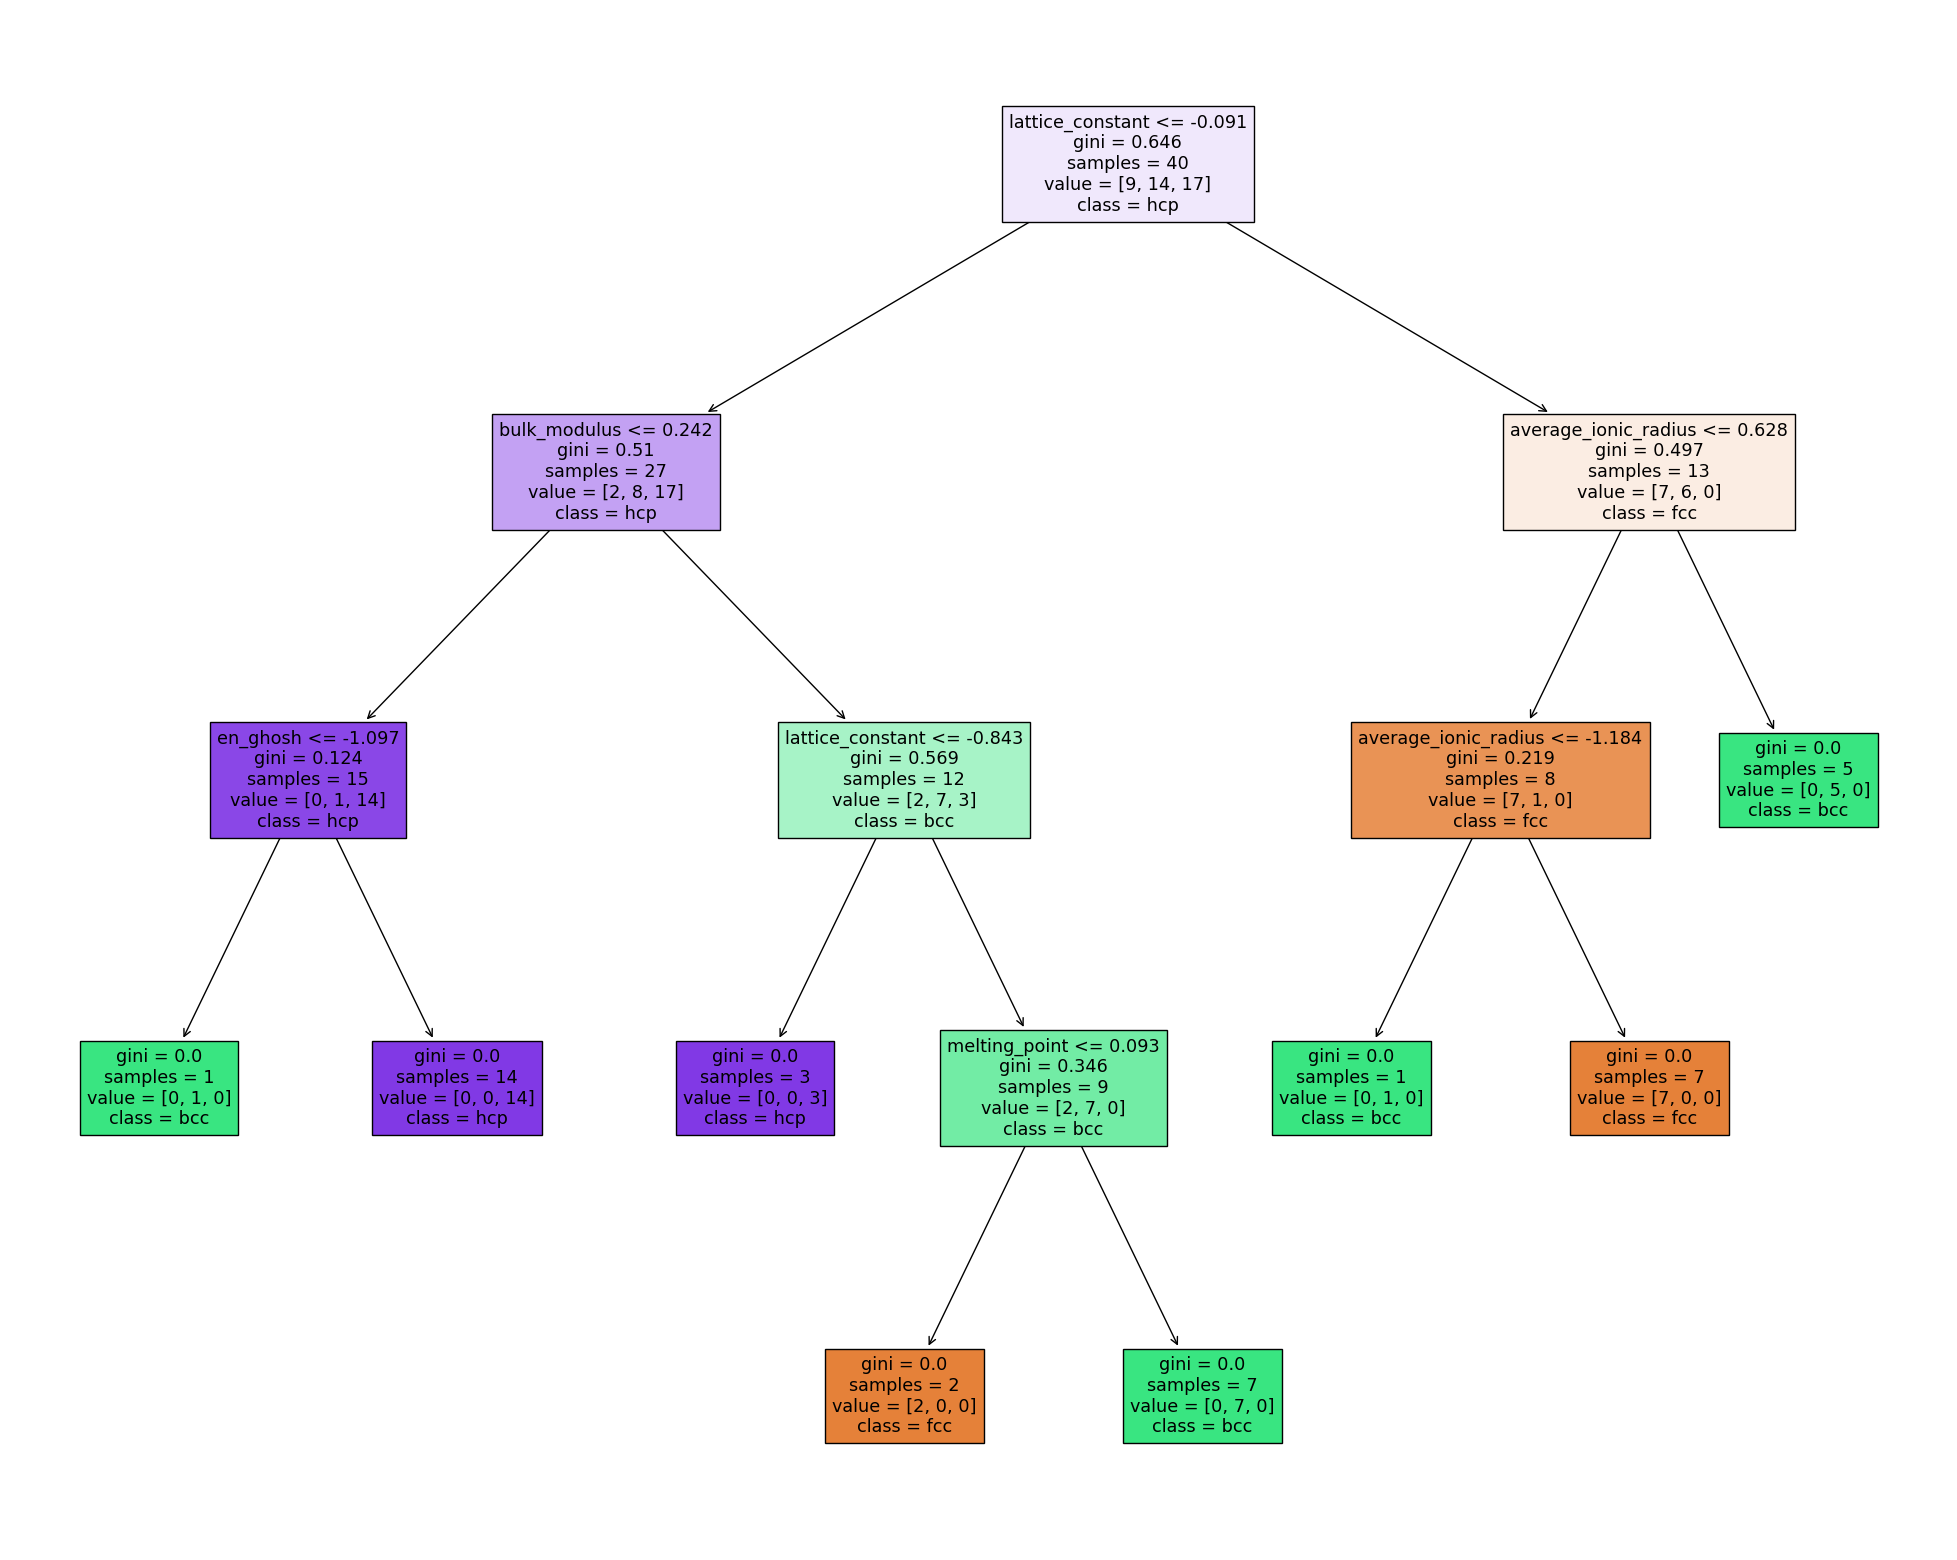

In [8]:
label_names = ('fcc', 'bcc', 'hcp')
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=querable_values, class_names = label_names, filled=True)

In [9]:
train_predictions = model.predict(train_values)
test_predictions = model.predict(test_values)

print("train_labels = ", train_labels)
print("test_labels = ", test_labels)

all_labels = np.hstack((train_labels, test_labels))
all_predictions = np.hstack((train_predictions, test_predictions))

predicted_labels = []
true_labels = []

for i in range(all_predictions.shape[0]):
    if (all_predictions[i] == 0):
        predicted_labels.append("FCC")
    if (all_labels[i] == 0):
        true_labels.append("FCC")
    if (all_predictions[i] == 1):
        predicted_labels.append("BCC")
    if (all_labels[i] == 1):
        true_labels.append("BCC")
    if (all_predictions[i] == 2):
        predicted_labels.append("HCP")
    if (all_labels[i] == 2):
        true_labels.append("HCP")

predicted_labels = np.array(predicted_labels).reshape((-1, 1))
true_labels = np.array(true_labels).reshape((-1, 1))
headings = ["Atomic number", "True crystal structure", "Predicted crystal structure"]

atomic_number_array = np.array(df.iloc[:, 0]).reshape((-1, 1))
plot_table = np.concatenate((atomic_number_array, true_labels, predicted_labels), axis=1)

plot_df = pd.DataFrame(plot_table, columns=headings)

train_labels =  [2 2 2 2 0 2 0 2 0 1 2 2 2 0 1 2 1 1 1 1 1 2 0 0 1 2 1 1 2 1 1 0 2 2 0 2 0
 1 1 2]
test_labels =  [2 2 0 1 0 2 0]


In [10]:
#Optimization of the decision tree
def decision_tree(criterion,max_depth):
    # Create Decision Tree classifer object
    model = DecisionTreeClassifier(criterion=criterion, max_depth=2)

    # Train Decision Tree Classifer
    model.fit(train_values, train_labels)

    #Predict the response for training and testing dataset
    train_pred = model.predict(train_values)
    test_pred = model.predict(test_values)

    # Model Accuracy for training and testing set, how often is the classifier correct?

    print('Training accuracy = %.3f ' % accuracy_score(train_labels, train_pred))
    print('Testing accuracy  = %.3f ' % accuracy_score(test_labels, test_pred))
    
for i in range(1,5):
    print("Criterion: gini, max_depth: ", i)
    decision_tree("gini",i)
    print("Criterion: entropy, max_depth: ", i)
    decision_tree("entropy",i)

Criterion: gini, max_depth:  1
Training accuracy = 0.825 
Testing accuracy  = 0.857 
Criterion: entropy, max_depth:  1
Training accuracy = 0.825 
Testing accuracy  = 1.000 
Criterion: gini, max_depth:  2
Training accuracy = 0.825 
Testing accuracy  = 1.000 
Criterion: entropy, max_depth:  2
Training accuracy = 0.825 
Testing accuracy  = 0.857 
Criterion: gini, max_depth:  3
Training accuracy = 0.825 
Testing accuracy  = 1.000 
Criterion: entropy, max_depth:  3
Training accuracy = 0.825 
Testing accuracy  = 1.000 
Criterion: gini, max_depth:  4
Training accuracy = 0.825 
Testing accuracy  = 1.000 
Criterion: entropy, max_depth:  4
Training accuracy = 0.825 
Testing accuracy  = 1.000 


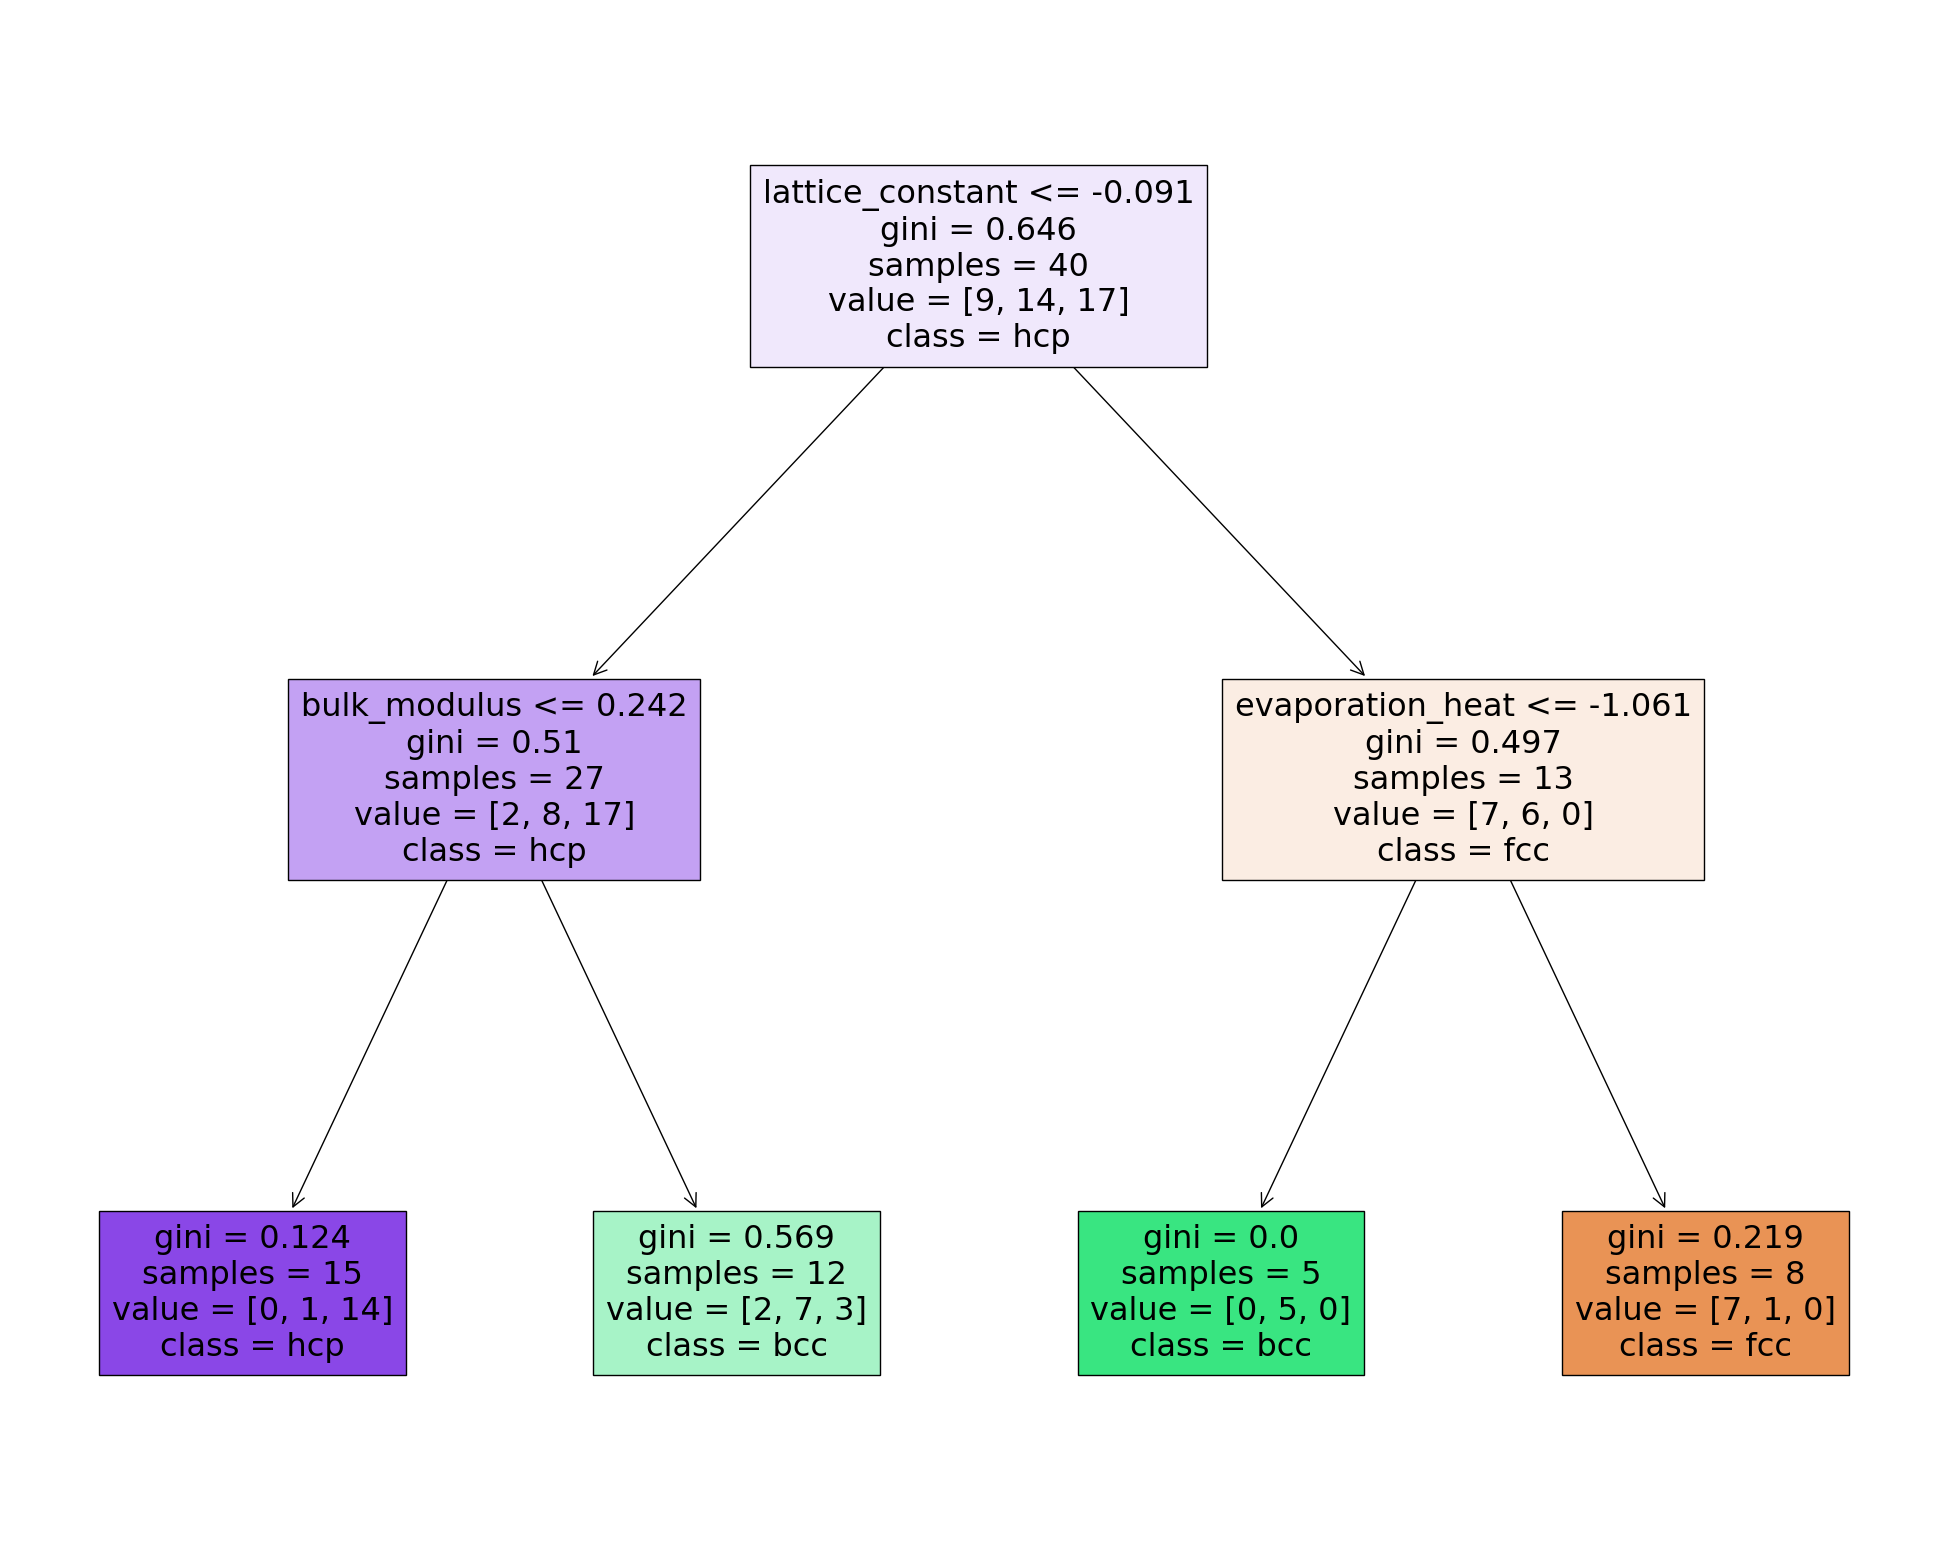

In [11]:
model = DecisionTreeClassifier(criterion="gini", max_depth=2,random_state=2)
model.fit(train_values, train_labels)
#Predict the response for training and testing dataset
train_pred = model.predict(train_values)
test_pred = model.predict(test_values)

label_names = ('fcc', 'bcc', 'hcp')
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=querable_values, class_names = label_names, filled=True)